In [1]:
import os
import sys
sys.path.append('../')
sys.path.append('../datasets')
sys.path.append('../models')
import torch
import torchvision
import torch.backends.cudnn as cudnn
import random
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from importlib import reload
from datasets.three_dim_shapes import ThreeDimShapesDataset
from datasets.small_norb import SmallNORBDataset
from datasets.seq_mnist import SequentialMNIST
import models.seqae as seqae
import models.base_networks as bn 
import models
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from einops import rearrange
from sklearn.metrics import r2_score
import pdb
from einops import rearrange
from utils import notebook_utils as nb
from utils import evaluations as ev



import copy

import csv
import ast
from source import yaml_utils as yu


from tqdm import tqdm

if torch.cuda.is_available():
    device = torch.device('cuda')
    cudnn.deterministic = True
    cudnn.benchmark = True
else:
    device = torch.device('cpu')
    gpu_index = -1

    
from utils import yaml_utils as yu
import yaml
rootpath = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/'
result_dir = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result'
jobdir = '/mnt/vol21/masomatics/ULASclone/jobs'

mode = 'so3'
dat_root = f"""/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/{mode}"""

playground_path = os.path.join(result_dir, '20220913_playground_model')
baseline_path = os.path.join(result_dir, '20220615_default_run_mnist')


print(os.path.exists(playground_path))

nb.filter_list('202209', os.listdir(result_dir))

True


['20220901_Mstar_inv_reg_cnn_0',
 '20220908_lstsq_Mdetach_0',
 '20220926_latentPredict_rerun_0',
 '20220909_latentPredict_zero_0',
 '20220908_latentPredict_bg_0',
 '20220901_Mstar_orth_0',
 '20220926_default_run_mnist',
 '20220907_latentPredict_0',
 '20220929_latentPred_0',
 '20220913_default_run_again_0',
 '20220913_playground_model']

In [2]:
projname =  'latentPredict'
#projname =  'latentPredict_rerun'
#projname = 'latentPredict_zero'
#projname= 'normalize_rerun'
print(projname)

setting_name = '20220906'
#setting_name = '20220929'
#setting_name = '20221004'
nb.filter_list(projname, os.listdir(result_dir))

latentPredict


['20220926_latentPredict_rerun_0',
 '20220909_latentPredict_zero_0',
 '20220908_latentPredict_bg_0',
 '20220907_latentPredict_0']

In [3]:

targdir = f'''20220907_{projname}_0'''

#targdir = '20221004_normalize_rerun_0'

jobpath = f'''../jobs/{setting_name}_{projname}'''
print(jobpath)
print(os.path.exists(jobpath))
#jobpath = os.path.join('../jobs/','_'.join(targdir.split('_')[:-1]))


targpath = os.path.join(result_dir, targdir)
targlist = os.listdir(targpath)

targlist = nb.model_exists(targlist,  targpath)
print(targlist)

../jobs/20220906_latentPredict
True
['reg_latent2_reg_obs10_dmodedefault_predictiveFalse', 'reg_latent005_reg_obs0_dmodedefault_predictiveFalse', 'reg_latent01_reg_obs10_dmodeplainh_predictiveTrue', 'reg_latent1_reg_obs0_dmodeplainh_predictiveFalse', 'reg_latent2_reg_obs0_dmodeplainh_predictiveTrue', 'reg_latent01_reg_obs0_dmodeplainh_predictiveTrue', 'reg_latent01_reg_obs0_dmodedefault_predictiveFalse', 'reg_latent1_reg_obs10_dmodeplainh_predictiveFalse', 'reg_latent005_reg_obs10_dmodedefault_predictiveTrue', 'reg_latent1_reg_obs10_dmodeplainh_predictiveTrue', 'reg_latent005_reg_obs10_dmodeplainh_predictiveTrue', 'reg_latent01_reg_obs0_dmodeplainh_predictiveFalse', 'reg_latent2_reg_obs0_dmodeplainh_predictiveFalse', 'reg_latent01_reg_obs10_dmodedefault_predictiveTrue', 'reg_latent005_reg_obs0_dmodeplainh_predictiveTrue', 'reg_latent1_reg_obs10_dmodedefault_predictiveTrue', 'reg_latent005_reg_obs10_dmodeplainh_predictiveFalse', 'reg_latent01_reg_obs0_dmodedefault_predictiveTrue', 'reg_

['reg_latent2_reg_obs10_dmodedefault_predictiveFalse', 'reg_latent005_reg_obs0_dmodedefault_predictiveFalse', 'reg_latent01_reg_obs10_dmodeplainh_predictiveTrue', 'reg_latent1_reg_obs0_dmodeplainh_predictiveFalse', 'reg_latent2_reg_obs0_dmodeplainh_predictiveTrue', 'reg_latent01_reg_obs0_dmodeplainh_predictiveTrue', 'reg_latent01_reg_obs0_dmodedefault_predictiveFalse', 'reg_latent1_reg_obs10_dmodeplainh_predictiveFalse', 'reg_latent005_reg_obs10_dmodedefault_predictiveTrue', 'reg_latent1_reg_obs10_dmodeplainh_predictiveTrue', 'reg_latent005_reg_obs10_dmodeplainh_predictiveTrue', 'reg_latent01_reg_obs0_dmodeplainh_predictiveFalse', 'reg_latent2_reg_obs0_dmodeplainh_predictiveFalse', 'reg_latent01_reg_obs10_dmodedefault_predictiveTrue', 'reg_latent005_reg_obs0_dmodeplainh_predictiveTrue', 'reg_latent1_reg_obs10_dmodedefault_predictiveTrue', 'reg_latent005_reg_obs10_dmodeplainh_predictiveFalse', 'reg_latent01_reg_obs0_dmodedefault_predictiveTrue', 'reg_latent1_reg_obs10_dmodedefault_predi

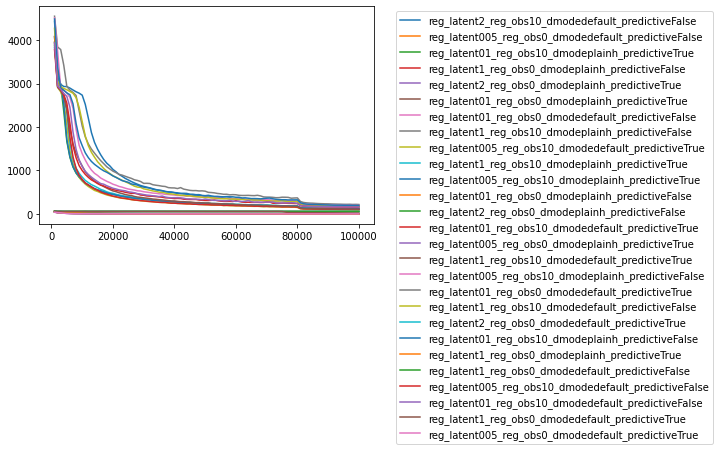

In [4]:
print(os.listdir(targpath))

resultlist = os.listdir(targpath)
print(resultlist)


for result in resultlist:
    studypath = os.path.join(targpath, result)
    history = nb.read_history(studypath)
    if len(history) > 0:
        plt.plot(history['iteration'], history['train/loss'], label = result)
        #print(history['train/loss'][-1])
plt.legend(bbox_to_anchor=(1.05, 1))
#plt.savefig(os.path.join(jobpath, f"""{targdir}_learning.png"""))

In [12]:
reload(ev)
results = {} 
inferred_Ms = {} 
model_configs = {}
models = {}
tp = 17
n_cond = 2
device =0
predictive = False
reconstructive = False
repeats=3


targdir_pathlist = [os.path.join(targpath, targdir) for targdir in targlist] 
targdir_pathlist = nb.filter_queries(['normalize2'] , targdir_pathlist)

#targdir_pathlist = []
targdir_pathlist.append(playground_path)

print(targdir_pathlist)





['/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20220929_latentPred_0/loss_reconst_coeff10_loss_latent_coeff0001_normalize2', '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20220929_latentPred_0/loss_reconst_coeff01_loss_latent_coeff00001_normalize2', '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20220929_latentPred_0/loss_reconst_coeff01_loss_latent_coeff001_normalize2', '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20220929_latentPred_0/loss_reconst_coeff10_loss_latent_coeff00001_normalize2', '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20220929_latentPred_0/loss_reconst_coeff10_loss_latent_coeff00001_normalize2id12', '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20220929_latentPred_0/loss_reconst_coeff01_loss_latent_coeff0001_normalize2', '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20220929_latentPred_0/loss_reconst_coeff10_loss_latent_coeff001_normalize2', '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20220929_latentP

In [13]:
reload(ev)
reload(bn)
allresults, targ, xnext = ev.prediction_evalutation(targdir_pathlist, 
                                                                        device =0,
                                                                        n_cond=2,
                                                                        tp=5,
                                                                    repeats=3,
                           predictive= False , reconstructive = False)

results = allresults['results']

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /tmp/datasets/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/datasets/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /tmp/datasets/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/datasets/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /tmp/datasets/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/datasets/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /tmp/datasets/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/datasets/MNIST/MNIST/raw

{'args': {'T': 7, 'max_T': 7, 'max_angle_velocity_ratio': [-0.5, 0.5], 'max_color_velocity_ratio': [-0.5, 0.5], 'only_use_digit4': True, 'root': '/tmp/datasets/MNIST', 'train': False}, 'fn': './datasets/seq_mnist.py', 'name': 'SequentialMNIST'}


AttributeError: module 'seqae' has no attribute 'SeqAENeuralMLatentPredict'

Text(0.5, 1.0, 'Prediction Error')

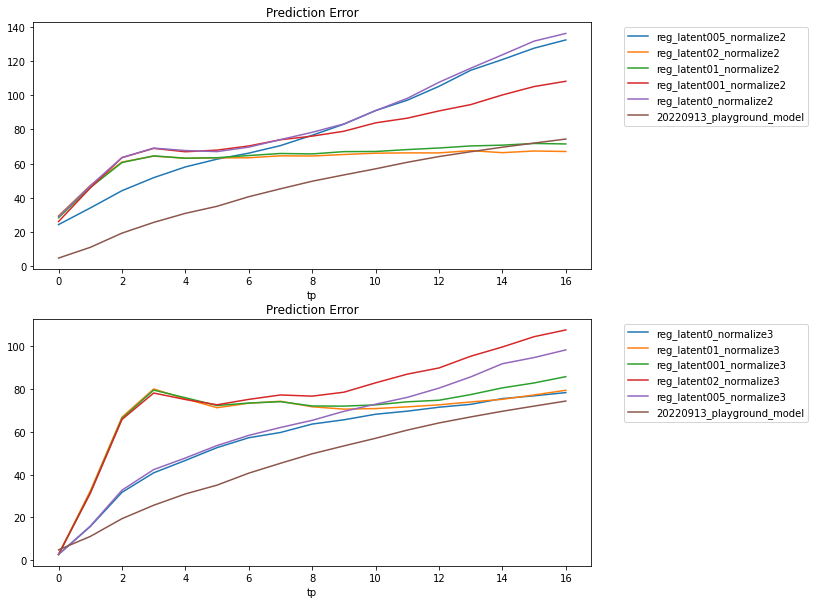

In [72]:
plt.figure(figsize= (10,10))


plt.subplot(2, 1, 1)
reload(nb)
#showresults = []
showresults = nb.filter_queries(['normalize2'] , list(results.keys()))

#showresults.append(baseline_path)
showresults.append(playground_path)


for mode in showresults:
    plt.plot(results[mode][0], label=mode.split('/')[-1])
    plt.xlabel("tp")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Prediction Error")


plt.subplot(2, 1, 2)
reload(nb)
#showresults = []
showresults = nb.filter_queries(['normalize3'] , list(results.keys()))

#showresults.append(baseline_path)
showresults.append(playground_path)


for mode in showresults:
    plt.plot(results[mode][0], label=mode.split('/')[-1])
    plt.xlabel("tp")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Prediction Error")



#plt.savefig(os.path.join(jobpath, targdir+'l2loss.png'))

In [73]:
goodpath = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20220926_latentPredict_rerun_0/reg_latent005_reg_obs10'

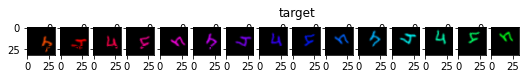

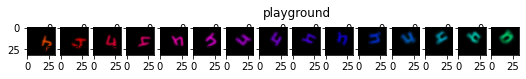

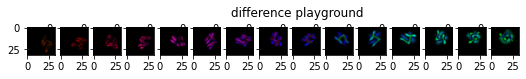

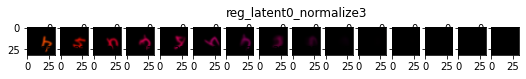

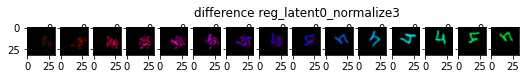

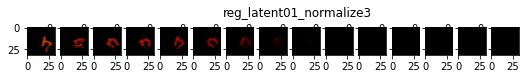

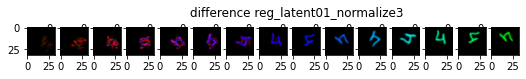

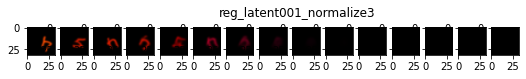

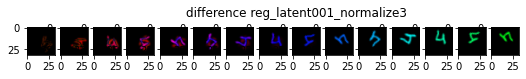

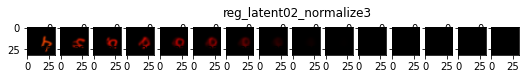

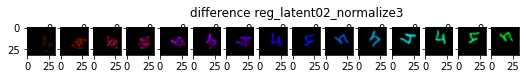

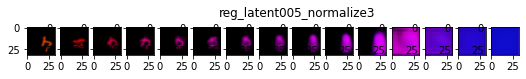

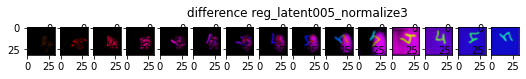

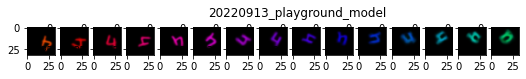

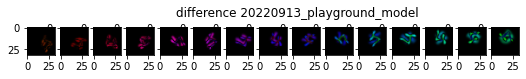

In [74]:
idx = 8
figsize = (10,1)

    
plt.figure(figsize = figsize)
for k in range(15):
    tn = torch.permute(targ[idx][k+n_cond], (1,2,0))
    plt.subplot(1, tp, k+1)
    plt.imshow(tn)
plt.suptitle("target")  

plt.figure(figsize = figsize)
xnext, M = ev.predict(targ, allresults['models'][playground_path],
            n_cond=2, tp=15, device='cpu', swap =False,
            predictive=False, reconstructive=False)
for k in range(15):
    xn = torch.permute(xnext[idx][k], (1,2,0))
    plt.subplot(1, tp, k+1)
    plt.imshow(xn)
plt.suptitle("playground")    


plt.figure(figsize = figsize)
for k in range(15):
    dn = torch.permute(torch.abs(targ[idx][k+n_cond] - xnext[idx][k]) , (1,2,0))
    plt.subplot(1, tp, k+1)
    plt.imshow(dn)
plt.suptitle("difference playground")


for mode in showresults:

    plt.figure(figsize = figsize)
    xnext, M = ev.predict(targ, allresults['models'][mode],
                n_cond=2, tp=15, device='cpu', swap =False,
                predictive=False, reconstructive=False)
    for k in range(15):
        xn = torch.permute(xnext[idx][k], (1,2,0))
        plt.subplot(1, tp, k+1)
        plt.imshow(xn)
    plt.suptitle(mode.split('/')[-1])    

    plt.figure(figsize = figsize)
    for k in range(15):
        dn = torch.permute(torch.abs(targ[idx][k+n_cond] - xnext[idx][k]) , (1,2,0))
        plt.subplot(1, tp, k+1)
        plt.imshow(dn)
    plt.suptitle(f"""difference {mode.split('/')[-1]}""")

In [60]:
ls ../jobs/20221004*

../jobs/20221004_normalize_rerun:
debug.sh  normalize_rerun.yaml  write_shell.sh

../jobs/20221004_normalize_rerun_bg:
normalize_rerun_bg.yaml  write_shell.sh


In [61]:
jobpath

'../jobs/20221004_latentPredict_rerun'